In [27]:
import pandas as pd

In [28]:
df = pd.read_csv("../data/average-monthly-surface-temperature.csv")

In [29]:
pais = ["Brazil"]
df_filtrado = df[df["Entity"].isin(pais)]

In [30]:
dados_brazil = df[df["Entity"] == "Brazil"]

In [31]:
# # Verificando se está pegando o pais de escolha
# print(df_filtrado.head())

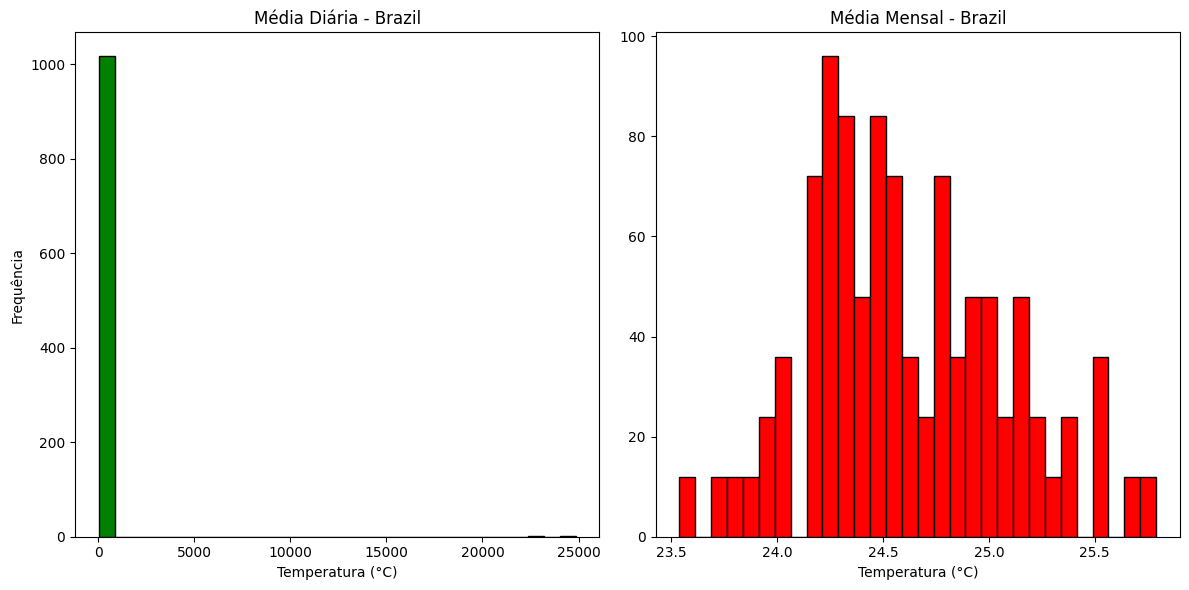

In [32]:
# Importar método de gerar histograma
from Funcoes import gerar_histogramas

# Gerar histograma do pais selecionado "Contém outliers"
gerar_histogramas("Brazil", dados_brazil)

In [33]:
# Importar método de identificar outliers
from Funcoes import identificar_outliers

# Função para identificar outliers
outliers_diario = identificar_outliers(dados_brazil['Average surface temperature daily'], 1.5)
outliers_mensal = identificar_outliers(dados_brazil['Average surface temperature monthly'], 1.5)

# Printando os outliers
print(f"Outliers diários:\n {outliers_diario}")
print(f"\nOutliers mensais:\n {outliers_mensal}")

Outliers diários:
 24558    22855.000000
24677       21.772010
24906       21.690779
24972    24822.000000
24980    24843.000000
Name: Average surface temperature daily, dtype: float64

Outliers mensais:
 Series([], Name: Average surface temperature monthly, dtype: float64)


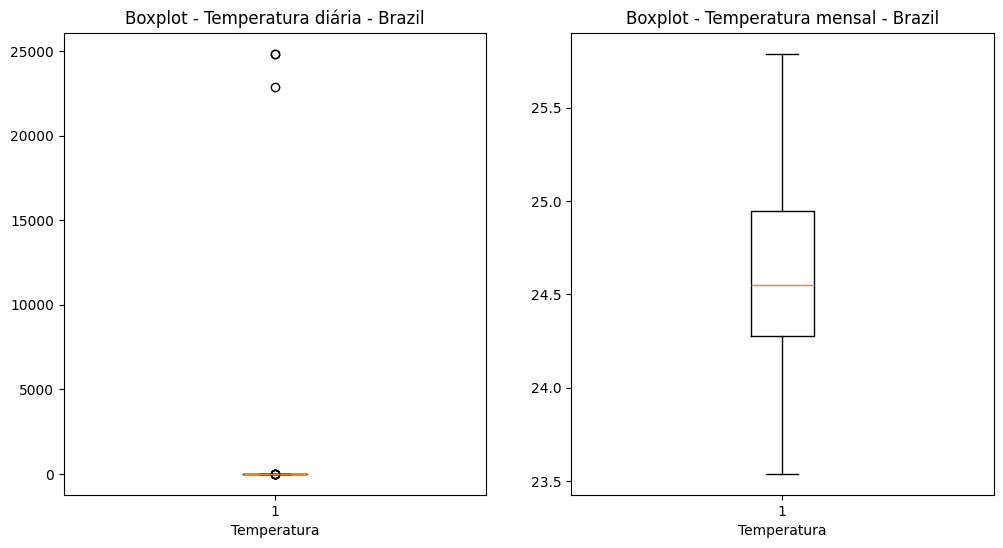

In [34]:
# Importar método de gerar boxplot "Contém outliers"
from Funcoes import gerar_boxplot

gerar_boxplot("Brazil", dados_brazil)

In [35]:
from Funcoes import identificar_outliers_limite_superior

outliers_diario_superior = identificar_outliers_limite_superior(dados_brazil['Average surface temperature daily'])
print(outliers_diario_superior)

24558    22855.0
24972    24822.0
24980    24843.0
Name: Average surface temperature daily, dtype: float64


In [36]:
df_sem_outliers = dados_brazil[~dados_brazil['Average surface temperature daily'].isin(outliers_diario_superior)]

In [37]:
# Importar metódo de análise de periodo
from Funcoes import analisar_periodo

mes_inicial, mes_final = analisar_periodo(df_sem_outliers, 'Day')



Período de análise:
Primeiro mês: 1940-01
Último mês: 2024-12


c:\Users\igorm\OneDrive\Documentos\CursoPythonIA\AnaliseTemperaturaPaises\src\Funcoes.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['data_datetime'] = pd.to_datetime(dataframe[coluna_data])
c:\Users\igorm\OneDrive\Documentos\CursoPythonIA\AnaliseTemperaturaPaises\src\Funcoes.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['ano_mes'] = dataframe['data_datetime'].dt.to_period('M')


In [38]:
# Importar função para identificação de meses faltantes
from Funcoes import identificar_meses_faltantes

identificar_meses_faltantes(df_sem_outliers, 'Day')


Meses faltantes: 3
- 1946-07
- 1981-01
- 1981-09


PeriodIndex(['1946-07', '1981-01', '1981-09'], dtype='period[M]')